In [1]:
!pip uninstall pandas-profiling

Found existing installation: pandas-profiling 3.6.2
Uninstalling pandas-profiling-3.6.2:
  Would remove:
    /usr/local/bin/pandas_profiling
    /usr/local/lib/python3.8/dist-packages/pandas_profiling-3.6.2.dist-info/*
    /usr/local/lib/python3.8/dist-packages/pandas_profiling/*
Proceed (Y/n)? y
  Successfully uninstalled pandas-profiling-3.6.2


In [2]:
!pip install pandas-profiling[notebook,htm1]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas_profiling-3.6.2-py2.py3-none-any.whl (328 kB)


In [3]:
pip install country_converter --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
import matplotlib.pyplot as plt
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import country_converter as coco
import plotly.express as px
from plotly import offline as pyo
from plotly import graph_objs as go

In [5]:
df = pd.read_csv('/content/survey_results_public.csv')
df

ResponseId                                         MainBranch  \
0               1                                      None of these   
1               2                     I am a developer by profession   
2               3  I am not primarily a developer, but I write co...   
3               4                     I am a developer by profession   
4               5                     I am a developer by profession   
...           ...                                                ...   
73263       73264                     I am a developer by profession   
73264       73265                     I am a developer by profession   
73265       73266  I am not primarily a developer, but I write co...   
73266       73267                     I am a developer by profession   
73267       73268  I used to be a developer by profession, but no...   

                                              Employment  \
0                                                    NaN   
1                                    Employed, full-time   
2                                    Employed, full-time   
3                                    Employed, full-time   
4                                    Employed, full-time   
...                                                  ...   
73263                                Employed, full-time   
73264                                Employed, full-time   
73265                                Employed, full-time   
73266                                Employed, full-time   
73267  Independent contractor, freelancer, or self-em...   

                                 RemoteWork  \
0                                       NaN   
1                              Fully remote   
2      Hybrid (some remote, some in-person)   
3                              Fully remote   
4      Hybrid (some remote, some in-person)   
...                                     ...   
73263                          Fully remote   
73264                        Full in-person   
73265  Hybrid (some remote, some in-person)   
73266  Hybrid (some remote, some in-person)   
73267                          Fully remote   

                                        CodingActivities  \
0                                                    NaN   
1               Hobby;Contribute to open-source projects   
2                                                  Hobby   
3                           I don’t code outside of work   
4                                                  Hobby   
...                                                  ...   
73263                            Freelance/contract work   
73264                                              Hobby   
73265                      Hobby;School or academic work   
73266                                              Hobby   
73267  Hobby;Contribute to open-source projects;Boots...   

                                               EdLevel  \
0                                                  NaN   
1                                                  NaN   
2      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3         Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4         Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                                                ...   
73263     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73264  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
73265     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73266     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73267     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                               LearnCode  \
0                                                    NaN   
1                                                    NaN   
2      Books / Physical media;Friend or family member...   
3      Books / Physical media;School (i.e., Universit...   
4      Other online resources (e.g., videos, blogs, f...   
...                                                  ...   
73263  Books / Phy

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [7]:
df_copy = df.copy()
selected_columns = ['Country','Age','Gender','EdLevel','YearsCode','YearsCodePro','LanguageHaveWorkedWith','LanguageWantToWorkWith','LearnCodeCoursesCert','ProfessionalTech','SOAccount','Employment','DevType','WorkExp',]

df = df[selected_columns]
df

Country              Age  \
0                                                    NaN              NaN   
1                                                 Canada              NaN   
2      United Kingdom of Great Britain and Northern I...  25-34 years old   
3                                                 Israel  35-44 years old   
4                               United States of America  25-34 years old   
...                                                  ...              ...   
73263                                            Nigeria  25-34 years old   
73264                           United States of America  25-34 years old   
73265                           United States of America  55-64 years old   
73266  United Kingdom of Great Britain and Northern I...  55-64 years old   
73267                                             Canada  25-34 years old   

      Gender                                          EdLevel YearsCode  \
0        NaN                                              NaN       NaN   
1        NaN                                              NaN       NaN   
2        Man  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        14   
3        Man     Bachelor’s degree (B.A., B.S., B.Eng., etc.)        20   
4        NaN     Bachelor’s degree (B.A., B.S., B.Eng., etc.)         8   
...      ...                                              ...       ...   
73263    Man     Bachelor’s degree (B.A., B.S., B.Eng., etc.)         8   
73264    Man  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)         6   
73265    Man     Bachelor’s degree (B.A., B.S., B.Eng., etc.)        42   
73266    Man     Bachelor’s degree (B.A., B.S., B.Eng., etc.)        50   
73267    Man     Bachelor’s degree (B.A., B.S., B.Eng., etc.)        16   

      YearsCodePro                             LanguageHaveWorkedWith  \
0              NaN                                                NaN   
1              NaN                              JavaScript;TypeScript   
2                5                  C#;C++;HTML/CSS;JavaScript;Python   
3               17                       C#;JavaScript;SQL;TypeScript   
4                3        C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript   
...            ...                                                ...   
73263            5  Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...   
73264            5          Bash/Shell;HTML/CSS;JavaScript;Python;SQL   
73265           33                 HTML/CSS;JavaScript;PHP;Python;SQL   
73266           31                                      C#;Delphi;VBA   
73267            5        C#;JavaScript;Lua;PowerShell;SQL;TypeScript   

                               LanguageWantToWorkWith  \
0                                                 NaN   
1                                     Rust;TypeScript   
2               C#;C++;HTML/CSS;JavaScript;TypeScript   
3                                   C#;SQL;TypeScript   
4          C#;Elixir;F#;Go;JavaScript;Rust;TypeScript   
...                                               ...   
73263  Bash/Shell;Go;JavaScript;Python;SQL;TypeScript   
73264                      HTML/CSS;JavaScript;Python   
73265           C#;HTML/CSS;JavaScript;PHP;Python;SQL   
73266                                          Delphi   
73267                      PowerShell;Rust;TypeScript   

                   LearnCodeCoursesCert  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   
...                                 ...   
73263                             Udemy   
73264            Coursera;Udemy;Udacity   
73265  Udemy;Codecademy;Pluralsight;edX   
73266                               NaN   
73267                 Udemy;Pluralsight   

                                        ProfessionalTech  \
0                                                    NaN   
1                       

In [8]:
df.shape[0]

73268

In [9]:
index = 0
for i in df.isnull().sum(axis=1):
  if i >=13:
    df.drop(index, inplace=True)
  index+=1

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
print(df.duplicated().sum(), 'duplicated rows have been dropped')
df.drop_duplicates(inplace=True)
print(df.shape[0],'rows and', df.shape[1],'cols remaining')

8 duplicated rows have been dropped
71760 rows and 14 cols remaining


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
df = df.reset_index()
df

index                                            Country  \
0          1                                             Canada   
1          2  United Kingdom of Great Britain and Northern I...   
2          3                                             Israel   
3          4                           United States of America   
4          5                                            Germany   
...      ...                                                ...   
71755  73263                                            Nigeria   
71756  73264                           United States of America   
71757  73265                           United States of America   
71758  73266  United Kingdom of Great Britain and Northern I...   
71759  73267                                             Canada   

                   Age                  Gender  \
0                  NaN                     NaN   
1      25-34 years old                     Man   
2      35-44 years old                     Man   
3      25-34 years old                     NaN   
4      25-34 years old  Or, in your own words:   
...                ...                     ...   
71755  25-34 years old                     Man   
71756  25-34 years old                     Man   
71757  55-64 years old                     Man   
71758  55-64 years old                     Man   
71759  25-34 years old                     Man   

                                               EdLevel YearsCode YearsCodePro  \
0                                                  NaN       NaN          NaN   
1      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        14            5   
2         Bachelor’s degree (B.A., B.S., B.Eng., etc.)        20           17   
3         Bachelor’s degree (B.A., B.S., B.Eng., etc.)         8            3   
4      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        15          NaN   
...                                                ...       ...          ...   
71755     Bachelor’s degree (B.A., B.S., B.Eng., etc.)         8            5   
71756  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)         6            5   
71757     Bachelor’s degree (B.A., B.S., B.Eng., etc.)        42           33   
71758     Bachelor’s degree (B.A., B.S., B.Eng., etc.)        50           31   
71759     Bachelor’s degree (B.A., B.S., B.Eng., etc.)        16            5   

                                  LanguageHaveWorkedWith  \
0                                  JavaScript;TypeScript   
1                      C#;C++;HTML/CSS;JavaScript;Python   
2                           C#;JavaScript;SQL;TypeScript   
3            C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript   
4                                                C++;Lua   
...                                                  ...   
71755  Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...   
71756          Bash/Shell;HTML/CSS;JavaScript;Python;SQL   
71757                 HTML/CSS;JavaScript;PHP;Python;SQL   
71758                                      C#;Delphi;VBA   
71759        C#;JavaScript;Lua;PowerShell;SQL;TypeScript   

                               LanguageWantToWorkWith  \
0                                     Rust;TypeScript   
1               C#;C++;HTML/CSS;JavaScript;TypeScript   
2                                   C#;SQL;TypeScript   
3          C#;Elixir;F#;Go;JavaScript;Rust;TypeScript   
4                                                 Lua   
...                                               ...   
71755  Bash/Shell;Go;JavaScript;Python;SQL;TypeScript   
71756                      HTML/CSS;JavaScript;Python   
71757           C#;HTML/CSS;JavaScript;PHP;Python;SQL   
71758                                          Delphi   
71759                      PowerShell;Rust;TypeScript   

                   LearnCodeCoursesCert  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4      

In [12]:
df.drop(columns='index', inplace=True)

In [13]:
df.insert(8, 'KnowAndWantToWorkWith', None)

In [14]:
for i in df.index:
    one = str(df.loc[i,'LanguageHaveWorkedWith']).split(';')
    two = str(df.loc[i,'LanguageWantToWorkWith']).split(';')
    three = list(set(one).intersection(set(two)))
    if(three != ''):
      df.loc[i,'KnowAndWantToWorkWith'] = ";".join(three)

In [15]:
x = str(df['KnowAndWantToWorkWith'].to_list())
x

"['TypeScript', 'JavaScript;C++;C#;HTML/CSS', 'C#;SQL;TypeScript', 'JavaScript;TypeScript;C#', 'Lua', 'TypeScript;HTML/CSS;Python;JavaScript;C++', '', 'nan', 'Delphi;Swift;Java', 'JavaScript;C#', 'JavaScript;Rust;HTML/CSS', 'Swift;Rust;HTML/CSS', 'Ruby;Erlang;TypeScript;Elixir;HTML/CSS;JavaScript;SQL', 'JavaScript;Scala;HTML/CSS;Python', 'TypeScript;Bash/Shell;SQL;HTML/CSS', '', 'SQL;Python', 'C#;PowerShell;SQL', 'HTML/CSS;Python', 'TypeScript;Java;Bash/Shell;HTML/CSS;JavaScript;SQL', 'TypeScript;SQL;Python', 'C#;SQL', 'VBA', 'JavaScript;TypeScript;PHP;C++', 'TypeScript;Java;Swift;Kotlin;Dart', 'Groovy;Java;Bash/Shell;HTML/CSS;JavaScript', 'TypeScript;Rust;HTML/CSS', 'C++', '', '', 'Python', 'Go;Python', 'JavaScript;HTML/CSS;SQL;Python', 'Python', 'Python', 'Ruby;HTML/CSS;PHP;Python;JavaScript', 'SQL;Python', 'Scala;Groovy;Java;Bash/Shell;Perl;HTML/CSS;SQL', '', 'Bash/Shell;SQL;Python', 'Ruby;SQL;HTML/CSS;JavaScript;C#', 'nan', 'Kotlin;Bash/Shell;Java;SQL', '', 'Bash/Shell;Lua;C++;Pyth

In [16]:
x = str(df['KnowAndWantToWorkWith'].to_list())

to_remov = {"'": "", ";": " ", ",": "", "[": "", "]":"",}

for char in to_remov.keys():
    x = x.replace(char, to_remov[char])

x = x.lower()
x = re.sub(r"\s+", " ", x)
x

'typescript javascript c++ c# html/css c# sql typescript javascript typescript c# lua typescript html/css python javascript c++ nan delphi swift java javascript c# javascript rust html/css swift rust html/css ruby erlang typescript elixir html/css javascript sql javascript scala html/css python typescript bash/shell sql html/css sql python c# powershell sql html/css python typescript java bash/shell html/css javascript sql typescript sql python c# sql vba javascript typescript php c++ typescript java swift kotlin dart groovy java bash/shell html/css javascript typescript rust html/css c++ python go python javascript html/css sql python python python ruby html/css php python javascript sql python scala groovy java bash/shell perl html/css sql bash/shell sql python ruby sql html/css javascript c# nan kotlin bash/shell java sql bash/shell lua c++ python haskell java typescript c# html/css javascript sql html/css java bash/shell rust python javascript sql go bash/shell python javascript c#

In [17]:
getUnique = pd.DataFrame(x.split(' '))
getUnique[0].unique()

array(['typescript', 'javascript', 'c++', 'c#', 'html/css', 'sql', 'lua',
       'python', 'nan', 'delphi', 'swift', 'java', 'rust', 'ruby',
       'erlang', 'elixir', 'scala', 'bash/shell', 'powershell', 'vba',
       'php', 'kotlin', 'dart', 'groovy', 'go', 'perl', 'haskell', 'lisp',
       'c', 'clojure', 'r', 'apl', 'crystal', 'assembly', 'objective-c',
       'julia', 'f#', 'solidity', 'ocaml', 'matlab', 'sas', 'fortran',
       'cobol'], dtype=object)

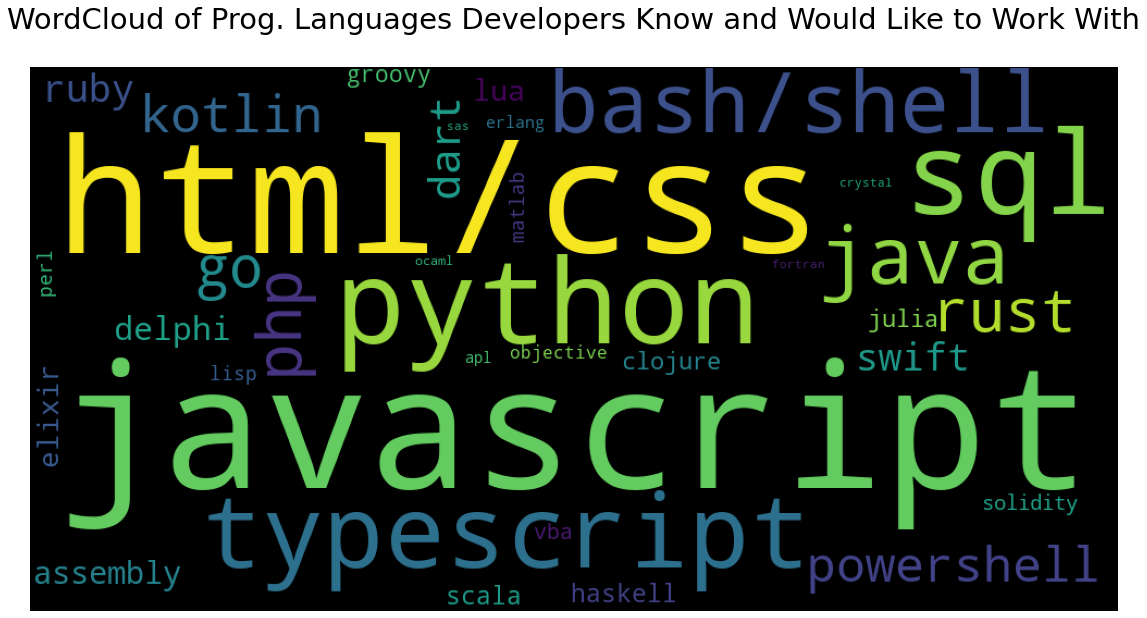

In [18]:
stp = ['nan']
wc = WordCloud(stopwords = stp,width = 1000, height = 500,collocations=False, min_font_size=10, regexp= r"\w[\w']*[+#/]*\w[\w']*").generate(x)

plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.title("WordCloud of Prog. Languages Developers Know and Would Like to Work With\n", fontdict={'fontsize': 29})
plt.show()

In [19]:
def makeWordCloud(colName):
  x = str(df[colName].to_list())

  to_remov = {"'": "", ";": " ", ",": "", "[": "", "]":"",}

  for char in to_remov.keys():
      x = x.replace(char, to_remov[char])

  x = x.lower()
  x = re.sub(r"\s+", " ", x)
  
  stp = ['nan' ]
  wc = WordCloud(stopwords = stp,width = 1000, height = 500,collocations=False, min_font_size=10, regexp= r"\w[\w']*[+#/]*\w[\w']*").generate(x)

  plt.figure(figsize=(20,10))
  plt.imshow(wc)
  plt.axis("off")
  plt.title("WordCloud of "+colName+"\n", fontdict={'fontsize': 29})
  plt.show()

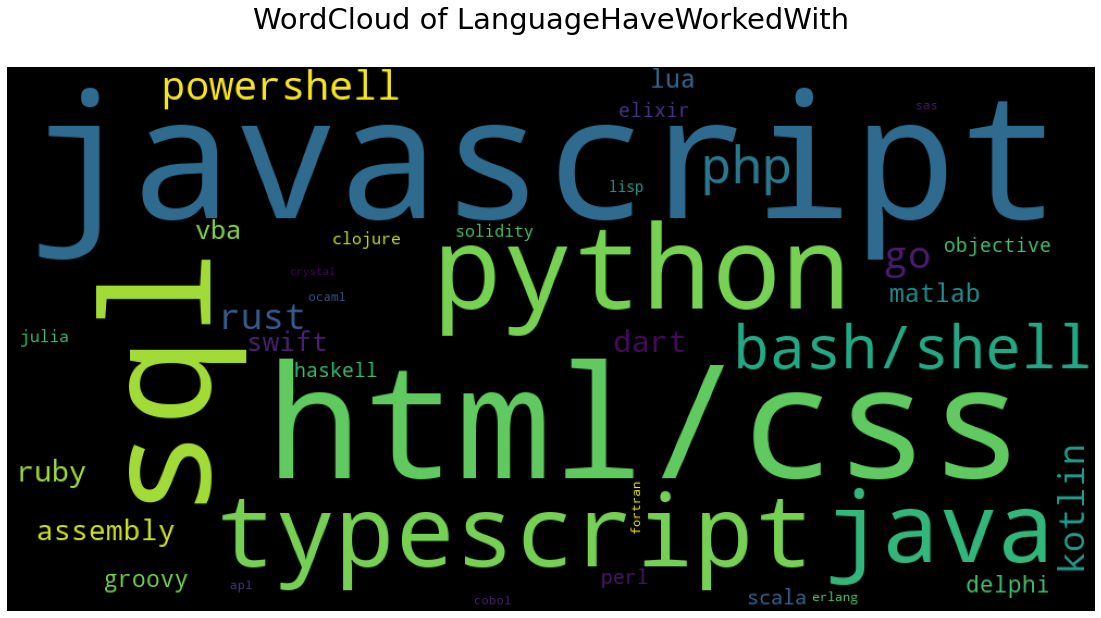

In [20]:
makeWordCloud('LanguageHaveWorkedWith')

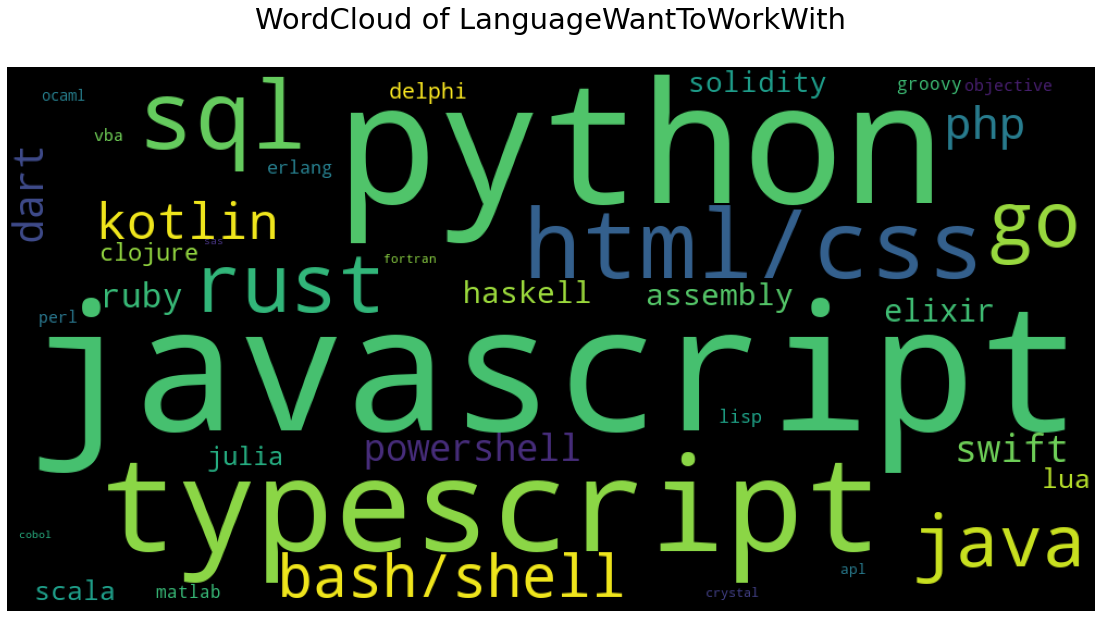

In [21]:
makeWordCloud('LanguageWantToWorkWith')

In [22]:
makeWordCloud('LearnCodeCoursesCert')

In [23]:
df['Country'].nunique()

180

In [24]:
cc = coco.CountryConverter()
df.insert(0, 'Standard_country_names',  cc.convert(names = df.Country, to = 'name_short'))
# df['Standard_country_names'] = cc.convert(names = df.Country, to = 'name_short')

In [25]:
df['Standard_country_names'].nunique()

179

In [26]:
df[['Country', 'Standard_country_names']]

Country  \
0                                                 Canada   
1      United Kingdom of Great Britain and Northern I...   
2                                                 Israel   
3                               United States of America   
4                                                Germany   
...                                                  ...   
71755                                            Nigeria   
71756                           United States of America   
71757                           United States of America   
71758  United Kingdom of Great Britain and Northern I...   
71759                                             Canada   

      Standard_country_names  
0                     Canada  
1             United Kingdom  
2                     Israel  
3              United States  
4                    Germany  
...                      ...  
71755                Nigeria  
71756          United States  
71757          United States  
71758         United Kingdom  
71759                 Canada  

[71760 rows x 2 columns]

In [27]:
df.drop(columns='Country', inplace=True)

In [28]:
df['Standard_country_names']= df['Standard_country_names'].str.replace(' ','')
df['Standard_country_names']

0               Canada
1        UnitedKingdom
2               Israel
3         UnitedStates
4              Germany
             ...      
71755          Nigeria
71756     UnitedStates
71757     UnitedStates
71758    UnitedKingdom
71759           Canada
Name: Standard_country_names, Length: 71760, dtype: object

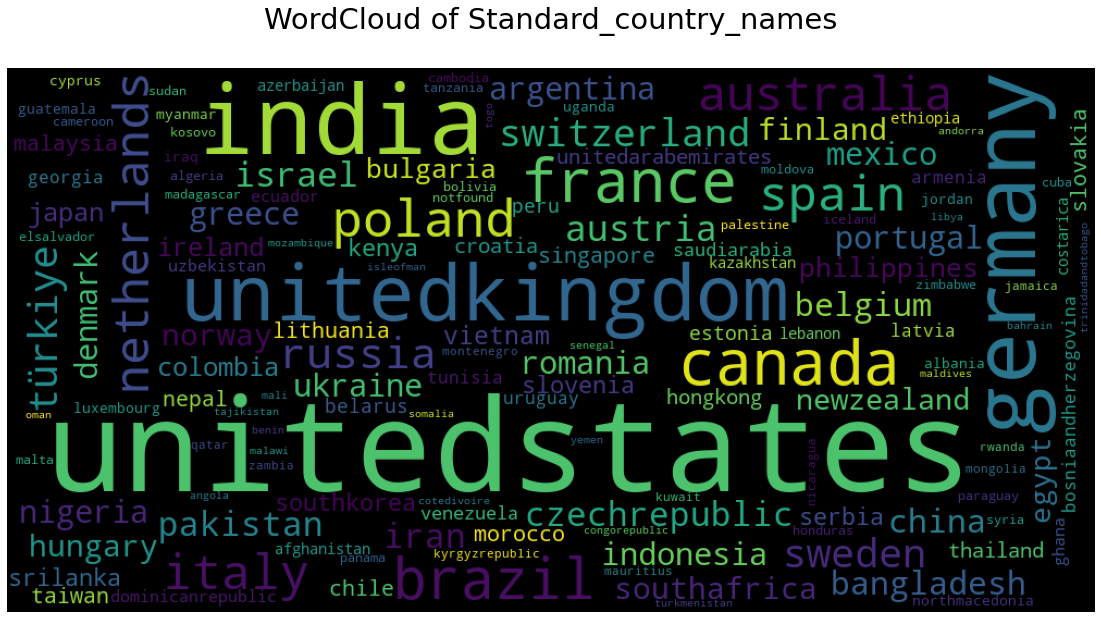

In [29]:
makeWordCloud('Standard_country_names')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71760 entries, 0 to 71759
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Standard_country_names  71760 non-null  object 
 1   Age                     70938 non-null  object 
 2   Gender                  70845 non-null  object 
 3   EdLevel                 71563 non-null  object 
 4   YearsCode               71323 non-null  object 
 5   YearsCodePro            51832 non-null  object 
 6   LanguageHaveWorkedWith  70971 non-null  object 
 7   LanguageWantToWorkWith  67024 non-null  object 
 8   KnowAndWantToWorkWith   71760 non-null  object 
 9   LearnCodeCoursesCert    29387 non-null  object 
 10  ProfessionalTech        34906 non-null  object 
 11  SOAccount               71564 non-null  object 
 12  Employment              71701 non-null  object 
 13  DevType                 61300 non-null  object 
 14  WorkExp                 36769 non-null

In [32]:
df.YearsCodePro = df.YearsCodePro.replace('Less than 1 year','0')
df.YearsCodePro = df.YearsCodePro.replace('More than 50 years','51')
df.YearsCodePro =  df.YearsCodePro.fillna(0)
df.YearsCodePro = df.YearsCodePro.astype(int)

In [33]:
df.YearsCode = df.YearsCode.replace('Less than 1 year','0')
df.YearsCode = df.YearsCode.replace('More than 50 years','51')
df.YearsCode =  df.YearsCode.fillna(0)
df.YearsCode = df.YearsCode.astype(int)

In [33]:
# data = [go.Bar(x=df['Standard_country_names'], y=df['YearsCode'], marker=dict(color='Cyan'), line=dict(color='Black', width=5)))]
# layout = go.Layout(title='SIMPLE BAR CHART', xaxis=dict(title='Country'), yaxis=dict(title='Years Of Code'), hovermode='closest')

# fig =  go.Figure(data=data, layout=layout)
# pyo.plot(fig, filename='Bar Chart.html')

In [34]:
df['Gender'] = df['Gender'].replace(['Or, in your own words:','Non-binary, genderqueer, or gender non-conforming','Man;Woman','Man;Woman;Non-binary, genderqueer, or gender non-conforming',
                      'Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming','Man;Or, in your own words:;Woman',
                      'Or, in your own words:;Non-binary, genderqueer, or gender non-conforming'], 'Prefer not to say')

df['Gender'] = df['Gender'].replace(['Man;Non-binary, genderqueer, or gender non-conforming','Man;Or, in your own words:', 
                                     'Man;Or, in your own words:;Non-binary, genderqueer, or gender non-conforming'], 'Man')

df['Gender'] = df['Gender'].replace(['Woman;Non-binary, genderqueer, or gender non-conforming','Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming', 
                                     'Or, in your own words:;Woman'], 'Woman')


In [35]:
df['Gender'].unique()

array([nan, 'Man', 'Prefer not to say', 'Woman'], dtype=object)

In [36]:
df['Employment'].unique()

array(['Employed, full-time', 'Student, full-time', 'Student, part-time',
       'Not employed, but looking for work',
       'Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Employed, part-time', 'Student, part-time;Employed, part-time',
       'Not employed, and not looking for work',
       'Student, full-time;Employed, part-time',
       'Employed, full-time;Student, part-time',
       'Employed, full-time;Student, full-time',
       'Student, part-time;Independent contractor, freelancer, or self-employed',
       'Retired', nan,
       'Student, full-time;Not employed, but looking for work',
       'I prefer not to say',
       'Student, full-time;Independent contractor, freelancer, or self-employed',
       'Student, full-time;Not employed, and not looking for work',
       'Not employed, but looking for work;Independent contractor, freelancer, or self-employed',
       'Employed, fu

In [37]:
for i in df.Employment:
    df['Employment'] = df['Employment'].replace(i, str(i).split(';')[0])

In [38]:
df

Standard_country_names              Age             Gender  \
0                     Canada              NaN                NaN   
1              UnitedKingdom  25-34 years old                Man   
2                     Israel  35-44 years old                Man   
3               UnitedStates  25-34 years old                NaN   
4                    Germany  25-34 years old  Prefer not to say   
...                      ...              ...                ...   
71755                Nigeria  25-34 years old                Man   
71756           UnitedStates  25-34 years old                Man   
71757           UnitedStates  55-64 years old                Man   
71758          UnitedKingdom  55-64 years old                Man   
71759                 Canada  25-34 years old                Man   

                                               EdLevel  YearsCode  \
0                                                  NaN          0   
1      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)         14   
2         Bachelor’s degree (B.A., B.S., B.Eng., etc.)         20   
3         Bachelor’s degree (B.A., B.S., B.Eng., etc.)          8   
4      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)         15   
...                                                ...        ...   
71755     Bachelor’s degree (B.A., B.S., B.Eng., etc.)          8   
71756  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)          6   
71757     Bachelor’s degree (B.A., B.S., B.Eng., etc.)         42   
71758     Bachelor’s degree (B.A., B.S., B.Eng., etc.)         50   
71759     Bachelor’s degree (B.A., B.S., B.Eng., etc.)         16   

       YearsCodePro                             LanguageHaveWorkedWith  \
0                 0                              JavaScript;TypeScript   
1                 5                  C#;C++;HTML/CSS;JavaScript;Python   
2                17                       C#;JavaScript;SQL;TypeScript   
3                 3        C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript   
4                 0                                            C++;Lua   
...             ...                                                ...   
71755             5  Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...   
71756             5          Bash/Shell;HTML/CSS;JavaScript;Python;SQL   
71757            33                 HTML/CSS;JavaScript;PHP;Python;SQL   
71758            31                                      C#;Delphi;VBA   
71759             5        C#;JavaScript;Lua;PowerShell;SQL;TypeScript   

                               LanguageWantToWorkWith  \
0                                     Rust;TypeScript   
1               C#;C++;HTML/CSS;JavaScript;TypeScript   
2                                   C#;SQL;TypeScript   
3          C#;Elixir;F#;Go;JavaScript;Rust;TypeScript   
4                                                 Lua   
...                                               ...   
71755  Bash/Shell;Go;JavaScript;Python;SQL;TypeScript   
71756                      HTML/CSS;JavaScript;Python   
71757           C#;HTML/CSS;JavaScript;PHP;Python;SQL   
71758                                          Delphi   
71759                      PowerShell;Rust;TypeScript   

                             KnowAndWantToWorkWith  \
0                                       TypeScript   
1                       JavaScript;C++;C#;HTML/CSS   
2                                C#;SQL;TypeScript   
3                         JavaScript;TypeScript;C#   
4                                              Lua   
...                                            ...   
71755  TypeScript;Bash/Shell;Python;JavaScript;SQL   
71756                   JavaScript;HTML/CSS;Python   
71757           HTML/CSS;PHP;Python;JavaScript;SQL   
71758                                       Delphi   
71759                        TypeScript;PowerShell   

                   LearnCodeCoursesCert  \
0                                   NaN   
1                                   NaN   
2       

In [39]:
df['DevType'].unique()

array([nan,
       'Data scientist or machine learning specialist;Developer, front-end;Engineer, data;Engineer, site reliability',
       'Developer, full-stack', ...,
       'Data scientist or machine learning specialist;Developer, front-end;Developer, full-stack;Developer, back-end;Developer, QA or test;Developer, mobile;Database administrator;Cloud infrastructure engineer;Data or business analyst;Designer;Blockchain',
       'Developer, front-end;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Developer, mobile;Educator;Developer, embedded applications or devices',
       'Developer, front-end;Engineer, data;Engineer, site reliability;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Developer, QA or test;Student;Developer, mobile;Academic researcher;DevOps specialist;Developer, embedded applications or devices;Developer, game or graphics;Cloud infrastructure engineer;Data or business analyst;Designer;Scie

In [40]:
# for i in df:
#     df['DevType'] = df['DevType'].replace(i, str(i).split(';')[0])

In [41]:
df.to_csv('surveyDFcleaned.csv')

In [42]:
profile = ProfileReport(df)
profile.to_notebook_iframe ()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]